<h1> __________________Sepehr Rezaei__________________ 
<h3> ________________________rsepehr746@gmail.com________________________ 

In [1]:
import pandas as pd

<h1>load data

In [2]:
text=pd.read_csv( 'spam.csv',encoding='ISO-8859-1')
text.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [3]:
text.drop(['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'], axis=1,inplace=True)
# Verify the updated DataFrame
text.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


<h4>number of ham & spam sms 

In [4]:
text['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

<h3>change ham to 0 and spam to 1

In [5]:
text['v1'] = text['v1'].replace({'ham': 0, 'spam': 1})
text.head(10)

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


<h2>Data Pre_Processing

<h4>make words to lowercase

In [6]:
text['v2']=text['v2'].str.lower()
text.head(10)

,v1,v2
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."
5,1,freemsg hey there darling it's been 3 week's n...
6,0,even my brother is not like to speak with me. ...
7,0,as per your request 'melle melle (oru minnamin...
8,1,winner!! as a valued network customer you have...
9,1,had your mobile 11 months or more? u r entitle...


<h4>removing stop words

In [7]:
from nltk.corpus import stopwords
import nltk


In [8]:
stopword=set(stopwords.words('english'))
def remove_stopwords(text):
    words = text.split()
    words = [word for word in words if word.lower() not in stopword]
    return ' '.join(words)
# Apply the remove_stopwords function to the 'sms' column
text['v2'] = text['v2'].apply(remove_stopwords)
text.head(10)

,v1,v2
0,0,"go jurong point, crazy.. available bugis n gre..."
1,0,ok lar... joking wif u oni...
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor... u c already say...
4,0,"nah think goes usf, lives around though"
5,1,freemsg hey darling 3 week's word back! i'd li...
6,0,even brother like speak me. treat like aids pa...
7,0,per request 'melle melle (oru minnaminunginte ...
8,1,winner!! valued network customer selected rece...
9,1,mobile 11 months more? u r entitled update lat...


<h4>Stemming with Porter stemmer 

In [9]:
from nltk.stem import porter
Pstemmer = porter.PorterStemmer()

In [10]:
text['v2'] = [Pstemmer.stem(word=wo) for wo in text['v2']]
text.head(10)

,v1,v2
0,0,"go jurong point, crazy.. available bugis n gre..."
1,0,ok lar... joking wif u oni...
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor... u c already say...
4,0,"nah think goes usf, lives around though"
5,1,freemsg hey darling 3 week's word back! i'd li...
6,0,even brother like speak me. treat like aids pa...
7,0,per request 'melle melle (oru minnaminunginte ...
8,1,winner!! valued network customer selected rece...
9,1,mobile 11 months more? u r entitled update lat...


<h1>store preprocessed data

In [11]:
text.to_csv('ready_text.csv')

<h2>Tokenization-TF*IDF

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
TFFi=TfidfVectorizer()
tffi_tokenized_text=TFFi.fit_transform(text['v2'])
tffi_tokenized_text


<5572x8820 sparse matrix of type '<class 'numpy.float64'>'
	with 50149 stored elements in Compressed Sparse Row format>

<h1>Bag of Word

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
vectorizer = CountVectorizer()
bow_model = vectorizer.fit_transform(text['v2'])
bow_tokenized_text=bow_model.toarray()      # returns the rows and column number of cells which have 1 as value
print(bow_tokenized_text)  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


<h1>Split data to Train and test 

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
tffi_x_train,tffi_x_test,tffi_y_train,tffi_y_test=train_test_split(tffi_tokenized_text,text['v1'],random_state=42,shuffle=True,test_size=0.3,stratify=text['v1'])
bow_x_train,bow_x_test,bow_y_train,bow_y_test=train_test_split(bow_tokenized_text,text['v1'],random_state=42,shuffle=True,test_size=0.3,stratify=text['v1'])

<h1>measures

In [18]:
from sklearn.metrics import recall_score,accuracy_score,precision_score,f1_score

<h1>KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
tffi_knn=KNeighborsClassifier(n_neighbors=13)
tffi_knn.fit(tffi_x_train,tffi_y_train)
knn_tffi_pred=tffi_knn.predict(X=tffi_x_test)
tffi_knn.score(X=tffi_x_test,y=tffi_y_test)

0.9479665071770335

In [21]:
bow_knn=KNeighborsClassifier(n_neighbors=13)
bow_knn.fit(X=bow_x_train,y=bow_y_train)
knn_bow_pred=bow_knn.predict(X=bow_x_test)
bow_knn.score(X=bow_x_test,y=bow_y_test)

0.8773923444976076

<h2>Measurin knn algorithms


In [22]:
knn_tffi_precision = precision_score(tffi_y_test, knn_tffi_pred)
knn_tffi_recall = recall_score(tffi_y_test, knn_tffi_pred)
knn_tffi_f1 = f1_score(tffi_y_test, knn_tffi_pred)
knn_tffi_accuracy = accuracy_score(tffi_y_test, knn_tffi_pred)
print("Measuring knn wit TF*IDF :\n")
print("Accuracy:", knn_tffi_accuracy)
print("Recall:", knn_tffi_recall)
print("Precision:", knn_tffi_precision)
print("F1-score:", knn_tffi_f1)

knn_bow_precision = precision_score(bow_y_test, knn_bow_pred)
knn_bow_recall = recall_score(bow_y_test, knn_bow_pred)
knn_bow_f1 = f1_score(bow_y_test, knn_bow_pred)
knn_bow_accuracy = accuracy_score(bow_y_test, knn_bow_pred)
print("\n\nMeasuring knn wit BOW :\n")
print("Accuracy:", knn_bow_accuracy)
print("Recall:", knn_bow_recall)
print("Precision:", knn_bow_precision)
print("F1-score:", knn_bow_f1)

Measuring knn wit TF*IDF :

Accuracy: 0.9479665071770335
Recall: 0.6116071428571429
Precision: 1.0
F1-score: 0.7590027700831026


Measuring knn wit BOW :

Accuracy: 0.8773923444976076
Recall: 0.08482142857142858
Precision: 1.0
F1-score: 0.15637860082304528


<h1>Random forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

<h5>Random forest with TF*IDF

In [24]:
tffi_Random_F=RandomForestClassifier(n_estimators=31,criterion='gini')
tffi_Random_F.fit(tffi_x_train,tffi_y_train)
tffi_Randmon_F_pred=tffi_Random_F.predict(X=tffi_x_test)
tffi_Random_F.score(X=tffi_x_test,y=tffi_y_test)

0.9754784688995215

<h5>Random_forest with BOW

In [25]:
bow_Random_F=RandomForestClassifier(n_estimators=31,criterion='gini')
bow_Random_F.fit(bow_x_train,bow_y_train)
bow_Randmon_F_pred=bow_Random_F.predict(X=bow_x_test)
bow_Random_F.score(X=bow_x_test,y=bow_y_test)

0.9766746411483254

<h4>Measuring both Random Forest 

In [26]:
tffi_Random_F_precision = precision_score(tffi_y_test, tffi_Randmon_F_pred)
tffi_Random_F_recall = recall_score(tffi_y_test, tffi_Randmon_F_pred)
tffi_Random_F_f1 = f1_score(tffi_y_test, tffi_Randmon_F_pred)
tffi_Random_F_accuracy = accuracy_score(tffi_y_test, tffi_Randmon_F_pred)
print("Measuring Random forest wit TF*IDF :\n")
print("Accuracy:", tffi_Random_F_accuracy)
print("Recall:", tffi_Random_F_recall)
print("Precision:", tffi_Random_F_precision)
print("F1-score:", tffi_Random_F_f1)

bow_Random_F_precision = precision_score(bow_y_test, bow_Randmon_F_pred)
bow_Random_F_recall = recall_score(bow_y_test, bow_Randmon_F_pred)
bow_Random_F_f1 = f1_score(bow_y_test, bow_Randmon_F_pred)
bow_Random_F_accuracy = accuracy_score(bow_y_test, bow_Randmon_F_pred)
print("\n\nMeasuring Random forest wit BOW :\n")
print("Accuracy:", bow_Random_F_accuracy)
print("Recall:", bow_Random_F_recall)
print("Precision:", bow_Random_F_precision)
print("F1-score:", bow_Random_F_f1)

Measuring Random forest wit TF*IDF :

Accuracy: 0.9754784688995215
Recall: 0.8169642857142857
Precision: 1.0
F1-score: 0.8992628992628993


Measuring Random forest wit BOW :

Accuracy: 0.9766746411483254
Recall: 0.8258928571428571
Precision: 1.0
F1-score: 0.9046454767726161


<h1>SVM

In [27]:
from sklearn import svm

<h5>SVM with TF*IDF

In [28]:
tffi_SVM=svm.SVC(kernel='rbf',C=10,gamma=0.1)
tffi_SVM.fit(tffi_x_train,tffi_y_train)
tffi_SVM_pred=tffi_SVM.predict(X=tffi_x_test)
tffi_SVM.score(X=tffi_x_test,y=tffi_y_test)

0.9838516746411483

<h5>SVM with BOW

In [29]:
bow_SVM=svm.SVC(kernel='rbf',C=10,gamma=0.1)
bow_SVM.fit(bow_x_train,bow_y_train)
bow_SVM_pred=bow_SVM.predict(X=bow_x_test)
bow_SVM.score(X=bow_x_test,y=bow_y_test)

0.9784688995215312

<h3>Measuring SVM

In [30]:
tffi_SVM_precision = precision_score(tffi_y_test, tffi_SVM_pred)
tffi_SVM_recall = recall_score(tffi_y_test, tffi_SVM_pred)
tffi_SVM_f1 = f1_score(tffi_y_test, tffi_SVM_pred)
tffi_SVM_accuracy = accuracy_score(tffi_y_test, tffi_SVM_pred)
print("Measuring SVM wit TF*IDF :\n")
print("Accuracy:", tffi_SVM_accuracy)
print("Recall:", tffi_SVM_recall)
print("Precision:", tffi_SVM_precision)
print("F1-score:", tffi_SVM_f1)

bow_SVM_precision = precision_score(bow_y_test, bow_SVM_pred)
bow_SVM_recall = recall_score(bow_y_test, bow_SVM_pred)
bow_SVM_f1 = f1_score(bow_y_test, bow_SVM_pred)
bow_SVM_accuracy = accuracy_score(bow_y_test, bow_SVM_pred)
print("\n\nMeasuring SVM wit BOW :\n")
print("Accuracy:", bow_SVM_accuracy)
print("Recall:", bow_SVM_recall)
print("Precision:", bow_SVM_precision)
print("F1-score:", bow_SVM_f1)

Measuring SVM wit TF*IDF :

Accuracy: 0.9838516746411483
Recall: 0.8928571428571429
Precision: 0.9852216748768473
F1-score: 0.936768149882904


Measuring SVM wit BOW :

Accuracy: 0.9784688995215312
Recall: 0.8392857142857143
Precision: 1.0
F1-score: 0.9126213592233009


<h1>Learning MLP

In [31]:
from tensorflow import  keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

<h5>split TF*IDF data

In [32]:
mlp_tf_x_train_full, mlp_tf_x_test, mlp_tf_y_train_full, mlp_tf_y_test = train_test_split(tffi_tokenized_text.toarray(),text['v1'],random_state=42,shuffle=True,test_size=0.1,stratify=text['v1'])
mlp_tf_x_train,mlp_tf_x_valid, mlp_tf_y_train, mlp_tf_y_valid = train_test_split(mlp_tf_x_train_full, mlp_tf_y_train_full,test_size=0.1)


<h5>split BOW data

In [33]:
mlp_bow_x_train_full, mlp_bow_x_test, mlp_bow_y_train_full, mlp_bow_y_test = train_test_split(bow_tokenized_text,text['v1'],random_state=42,shuffle=True,test_size=0.1,stratify=text['v1'])
mlp_bow_x_train,mlp_bow_x_valid, mlp_bow_y_train, mlp_bow_y_valid = train_test_split(mlp_bow_x_train_full, mlp_bow_y_train_full,test_size=0.1)


<h3>MLP with TF*IDF

In [34]:
from tensorflow import  keras
import random
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

In [35]:
model1 = Sequential()
model1.add(Dense(200, activation='relu', input_shape=(mlp_tf_x_train.shape[1],)))
model1.add(Dense(1, activation='sigmoid'))

compile model

In [36]:
model1.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

Train and Evaluate

In [37]:
history1 = model1.fit(mlp_tf_x_train, mlp_tf_y_train, validation_data=(mlp_tf_x_valid, mlp_tf_y_valid), epochs=10, batch_size=32)
# Evaluate the model
score1 = model1.evaluate(mlp_tf_x_test, mlp_tf_y_test)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Epoch 1/10


141/141 [==============================] - 1s 6ms/step - loss: 0.3325 - accuracy: 0.8958 - val_loss: 0.1136 - val_accuracy: 0.9821
Epoch 2/10
141/141 [==============================] - 1s 5ms/step - loss: 0.0585 - accuracy: 0.9863 - val_loss: 0.0621 - val_accuracy: 0.9841
Epoch 3/10
141/141 [==============================] - 1s 5ms/step - loss: 0.0201 - accuracy: 0.9967 - val_loss: 0.0550 - val_accuracy: 0.9841
Epoch 4/10
141/141 [==============================] - 1s 5ms/step - loss: 0.0093 - accuracy: 0.9984 - val_loss: 0.0522 - val_accuracy: 0.9861
Epoch 5/10
141/141 [==============================] - 1s 5ms/step - loss: 0.0048 - accuracy: 0.9993 - val_loss: 0.0520 - val_accuracy: 0.9861
Epoch 6/10
141/141 [==============================] - 1s 5ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0549 - val_accuracy: 0.9861
Epoch 7/10
141/141 [==============================] - 1s 5ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0555 - val_accuracy: 0.9861
Epoch 8/10
141/14

<h4>evaluate model on trainig data

<h1>plot train and test acurracy plot

In [38]:
from matplotlib import pyplot

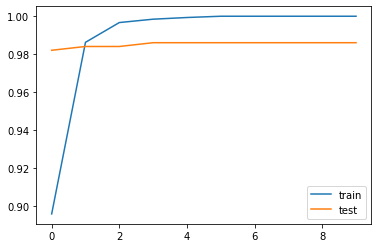

In [39]:
pyplot.plot(history1.history['accuracy'], label='train')
pyplot.plot(history1.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [40]:
# Evaluating the model on the train set
train_loss1, train_accuracy1 = model1.evaluate(mlp_tf_x_train, mlp_tf_y_train)
print("Train Loss:", train_loss1)
print("Train Accuracy:", train_accuracy1)

  1/141 [..............................] - ETA: 2s - loss: 3.1976e-04 - accuracy: 1.0000

141/141 [==============================] - 0s 1ms/step - loss: 6.4051e-04 - accuracy: 1.0000
Train Loss: 0.0006405110470950603
Train Accuracy: 1.0


<h4>evaluate model on test data

In [41]:
y_pred_prob1 = model1.predict(mlp_tf_x_test)

# Converting probabilities to class labels based on a threshold 
y_pred1 = (y_pred_prob1 >= 0.5).astype(int)

# Calculating precision, recall, F1-score, and accuracy
precision1 = precision_score(mlp_tf_y_test, y_pred1)
recall1 = recall_score(mlp_tf_y_test, y_pred1)
f11 = f1_score(mlp_tf_y_test, y_pred1)
accuracy1 = accuracy_score(mlp_tf_y_test, y_pred1)

print("Accuracy:", accuracy1)
print("Recall:", recall1)
print("Precision:", precision1)
print("F1-score:", f11)


18/18 [==============================] - 0s 1ms/step
Accuracy: 0.978494623655914
Recall: 0.84
Precision: 1.0
F1-score: 0.9130434782608696


<h1>MLP with BOW

Define the neural network model

In [42]:
model2 = Sequential()
model2.add(Dense(200, activation='relu', input_shape=(mlp_bow_x_train.shape[1],)))
model2.add(Dense(1, activation='sigmoid'))

Compile the model with SCA optimizer

In [43]:
model2.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

Train and Evaluate

In [44]:
history2 = model2.fit(mlp_bow_x_train, mlp_bow_y_train, validation_data=(mlp_bow_x_valid, mlp_bow_y_valid), epochs=10, batch_size=32)
# Evaluate the model
score2 = model2.evaluate(mlp_bow_x_test, mlp_bow_y_test)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Epoch 1/10


141/141 [==============================] - 1s 6ms/step - loss: 0.2316 - accuracy: 0.9561 - val_loss: 0.0605 - val_accuracy: 0.9880
Epoch 2/10
141/141 [==============================] - 1s 5ms/step - loss: 0.0308 - accuracy: 0.9931 - val_loss: 0.0416 - val_accuracy: 0.9900
Epoch 3/10
141/141 [==============================] - 1s 5ms/step - loss: 0.0099 - accuracy: 0.9984 - val_loss: 0.0413 - val_accuracy: 0.9900
Epoch 4/10
141/141 [==============================] - 1s 5ms/step - loss: 0.0046 - accuracy: 0.9996 - val_loss: 0.0436 - val_accuracy: 0.9900
Epoch 5/10
141/141 [==============================] - 1s 5ms/step - loss: 0.0028 - accuracy: 0.9998 - val_loss: 0.0454 - val_accuracy: 0.9900
Epoch 6/10
141/141 [==============================] - 1s 5ms/step - loss: 0.0020 - accuracy: 0.9998 - val_loss: 0.0472 - val_accuracy: 0.9900
Epoch 7/10
141/141 [==============================] - 1s 5ms/step - loss: 0.0015 - accuracy: 0.9998 - val_loss: 0.0490 - val_accuracy: 0.9900
Epoch 8/10
141/14

<h4>evaluate model on trainig data

In [45]:
# Evaluating the model on the train set
train_loss2, train_accuracy2 = model2.evaluate(mlp_bow_x_train, mlp_bow_y_train)
print("Train Loss:", train_loss2)
print("Train Accuracy:", train_accuracy2)

 26/141 [====>.........................] - ETA: 0s - loss: 4.0839e-04 - accuracy: 1.0000

141/141 [==============================] - 0s 2ms/step - loss: 6.2467e-04 - accuracy: 0.9998
Train Loss: 0.0006246714619919658
Train Accuracy: 0.9997783899307251


<h4>evaluate model on test data

In [46]:
y_pred_prob2 = model2.predict(mlp_bow_x_test)

# Converting probabilities to class labels based on a threshold 
y_pred2 = (y_pred_prob2 >= 0.5).astype(int)

# Calculating precision, recall, F1-score, and accuracy
precision2 = precision_score(mlp_bow_y_test, y_pred2)
recall2 = recall_score(mlp_bow_y_test, y_pred2)
f12 = f1_score(mlp_bow_y_test, y_pred2)
accuracy2 = accuracy_score(mlp_bow_y_test, y_pred2)

print("Accuracy:", accuracy2)
print("Recall:", recall2)
print("Precision:", precision2)
print("F1-score:", f12)


 1/18 [>.............................] - ETA: 0s

18/18 [==============================] - 0s 2ms/step
Accuracy: 0.9802867383512545
Recall: 0.8533333333333334
Precision: 1.0
F1-score: 0.9208633093525179


<h3>MLP with scaled data  TF*IDF

In [47]:
from sklearn.preprocessing import StandardScaler

scailing data

In [48]:
scaler = StandardScaler()
mlp_tf_x_train_scaled = scaler.fit_transform(mlp_tf_x_train)
mlp_tf_x_valid_scaled = scaler.transform(mlp_tf_x_valid)
mlp_tf_x_test_scaled = scaler.transform(mlp_tf_x_test)

Defining model

In [49]:
model3 = Sequential()
model3.add(Dense(200, activation='relu', input_shape=(mlp_tf_x_train_scaled.shape[1],)))
model3.add(Dense(1, activation='sigmoid'))

Compiling the model

In [50]:
model3.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

Train and Evaluate

In [51]:
history3 = model3.fit(mlp_tf_x_train_scaled, mlp_tf_y_train, validation_data=(mlp_tf_x_valid_scaled, mlp_tf_y_valid), epochs=10, batch_size=32)
test_loss3, test_accuracy3 = model3.evaluate(mlp_tf_x_test_scaled, mlp_tf_y_test)
print("Test Loss:", test_loss3)
print("Test Accuracy:", test_accuracy3)

Epoch 1/10


141/141 [==============================] - 1s 5ms/step - loss: 2.5481 - accuracy: 0.8092 - val_loss: 0.4730 - val_accuracy: 0.9522
Epoch 2/10
141/141 [==============================] - 1s 5ms/step - loss: 0.1044 - accuracy: 0.9860 - val_loss: 0.1550 - val_accuracy: 0.9661
Epoch 3/10
141/141 [==============================] - 1s 5ms/step - loss: 0.0102 - accuracy: 0.9962 - val_loss: 0.1163 - val_accuracy: 0.9661
Epoch 4/10
141/141 [==============================] - 1s 5ms/step - loss: 0.0045 - accuracy: 0.9976 - val_loss: 0.1110 - val_accuracy: 0.9681
Epoch 5/10
141/141 [==============================] - 1s 5ms/step - loss: 0.0032 - accuracy: 0.9998 - val_loss: 0.1057 - val_accuracy: 0.9681
Epoch 6/10
141/141 [==============================] - 1s 5ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0989 - val_accuracy: 0.9721
Epoch 7/10
141/141 [==============================] - 1s 5ms/step - loss: 8.6756e-04 - accuracy: 1.0000 - val_loss: 0.0927 - val_accuracy: 0.9721
Epoch 8/10
14

<h4>evaluate model on test data

In [52]:
y_pred_prob3 = model3.predict(mlp_tf_x_test_scaled)

# Converting probabilities to class labels based on a threshold 
y_pred3 = (y_pred_prob3 >= 0.5).astype(int)

# Calculating precision, recall, F1-score, and accuracy
precision3 = precision_score(mlp_tf_y_test, y_pred3)
recall3 = recall_score(mlp_tf_y_test, y_pred3)
f13 = f1_score(mlp_tf_y_test, y_pred3)
accuracy3 = accuracy_score(mlp_tf_y_test, y_pred3)

print("Accuracy:", accuracy3)
print("Recall:", recall3)
print("Precision:", precision3)
print("F1-score:", f13)


 1/18 [>.............................] - ETA: 0s

18/18 [==============================] - 0s 2ms/step
Accuracy: 0.9767025089605734
Recall: 0.84
Precision: 0.984375
F1-score: 0.9064748201438849


<h1>Voting betwen classifiers

In [53]:
from sklearn.ensemble import VotingClassifier

In [54]:
from sklearn.base import BaseEstimator, ClassifierMixin
from keras.wrappers.scikit_learn import KerasClassifier
class MLPClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.model = None

    def fit(self, X, y):
        self.model = Sequential()
        self.model.add(Dense(200, activation='relu', input_shape=(X.shape[1],)))
        self.model.add(Dense(1, activation='sigmoid'))
        self.model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
        self.model.fit(X, y, epochs=10, batch_size=32)

    def predict(self, X):
        return np.squeeze((self.model.predict(X) > 0.5).astype(int))

In [55]:
#votting betwen SVM and Random_f and KNN in tf-idf
ensemble1 = VotingClassifier(estimators=[ ('SVM', tffi_SVM), ('RF', tffi_Random_F), ('knn', tffi_knn)], voting='hard')

In [56]:
ensemble1.fit(tffi_x_train,tffi_y_train)

VotingClassifier(estimators=[('SVM', SVC(C=10, gamma=0.1)),
                             ('RF', RandomForestClassifier(n_estimators=31)),
                             ('knn', KNeighborsClassifier(n_neighbors=13))])

In [57]:
ens_prd1=ensemble1.predict(tffi_x_test)

In [58]:
ens1_precision = precision_score(y_true=tffi_y_test, y_pred=ens_prd1)
ens1_recall = recall_score(y_true=tffi_y_test,y_pred= ens_prd1)
ens1_f1 = f1_score(y_true=tffi_y_test, y_pred=ens_prd1)
ens1_accuracy = accuracy_score(y_true=tffi_y_test, y_pred=ens_prd1)

print("Accuracy:", ens1_accuracy)
print("Recall:", ens1_recall)
print("Precision:", ens1_precision)
print("F1-score:", ens1_f1)

Accuracy: 0.9760765550239234
Recall: 0.8214285714285714
Precision: 1.0
F1-score: 0.9019607843137255


<h3>add mlp to votting

In [59]:
mlp_classifier_tf1 = MLPClassifier()
ensemble2 = VotingClassifier(estimators=[ ('mlp',mlp_classifier_tf1),('SVM', tffi_SVM), ('RF', tffi_Random_F), ('knn', tffi_knn)], voting='hard')

In [60]:
ensemble2.fit(X=tffi_x_train,y=tffi_y_train)

Epoch 1/10


122/122 [==============================] - 2s 10ms/step - loss: 0.3695 - accuracy: 0.8846
Epoch 2/10
122/122 [==============================] - 1s 10ms/step - loss: 0.0752 - accuracy: 0.9836
Epoch 3/10
122/122 [==============================] - 1s 10ms/step - loss: 0.0252 - accuracy: 0.9951
Epoch 4/10
122/122 [==============================] - 1s 10ms/step - loss: 0.0118 - accuracy: 0.9982
Epoch 5/10
122/122 [==============================] - 1s 10ms/step - loss: 0.0064 - accuracy: 0.9990
Epoch 6/10
122/122 [==============================] - 1s 10ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 7/10
122/122 [==============================] - 1s 10ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 8/10
122/122 [==============================] - 1s 10ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 9/10
122/122 [==============================] - 1s 10ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 10/10
122/122 [==============================] - 1s 10ms/step - loss: 0.0010 - accuracy: 1.0000


VotingClassifier(estimators=[('mlp', MLPClassifier()),
                             ('SVM', SVC(C=10, gamma=0.1)),
                             ('RF', RandomForestClassifier(n_estimators=31)),
                             ('knn', KNeighborsClassifier(n_neighbors=13))])

In [61]:
ens_prd2=ensemble2.predict(tffi_x_test)

 1/53 [..............................] - ETA: 2s

53/53 [==============================] - 0s 731us/step


In [62]:
ens2_precision = precision_score(y_true=tffi_y_test,y_pred=ens_prd2)
ens2_recall = recall_score(y_true=tffi_y_test, y_pred=ens_prd2)
ens2_f1 = f1_score(y_true=tffi_y_test, y_pred=ens_prd2)
ens2_accuracy = accuracy_score(y_true=tffi_y_test, y_pred=ens_prd2)

print("Accuracy:", ens2_accuracy)
print("Recall:", ens2_recall)
print("Precision:", ens2_precision)
print("F1-score:", ens2_f1)

Accuracy: 0.9796650717703349
Recall: 0.8482142857142857
Precision: 1.0
F1-score: 0.9178743961352658


<h3>votting with BOW

In [63]:
mlp_classifier_bow1 = MLPClassifier()
ensemble3 = VotingClassifier(estimators=[('mlp',mlp_classifier_bow1),('SVM', tffi_SVM), ('RF', tffi_Random_F), ('knn', tffi_knn)], voting='hard')

In [64]:
ensemble3.fit(X=bow_x_train,y=bow_y_train)
ens_prd3=ensemble3.predict(bow_x_test)


Epoch 1/10


122/122 [==============================] - 1s 5ms/step - loss: 0.2726 - accuracy: 0.9436
Epoch 2/10
122/122 [==============================] - 1s 5ms/step - loss: 0.0395 - accuracy: 0.9918
Epoch 3/10
122/122 [==============================] - 1s 5ms/step - loss: 0.0130 - accuracy: 0.9979
Epoch 4/10
122/122 [==============================] - 1s 5ms/step - loss: 0.0061 - accuracy: 0.9995
Epoch 5/10
122/122 [==============================] - 1s 5ms/step - loss: 0.0037 - accuracy: 0.9997
Epoch 6/10
122/122 [==============================] - 1s 5ms/step - loss: 0.0026 - accuracy: 0.9997
Epoch 7/10
122/122 [==============================] - 1s 5ms/step - loss: 0.0020 - accuracy: 0.9997
Epoch 8/10
122/122 [==============================] - 1s 5ms/step - loss: 0.0016 - accuracy: 0.9997
Epoch 9/10
122/122 [==============================] - 1s 5ms/step - loss: 0.0013 - accuracy: 0.9997
Epoch 10/10
53/53 [==============================] - 0s 2ms/step


In [65]:
ens3_precision = precision_score(y_true=bow_y_test,y_pred=ens_prd3)
ens3_recall = recall_score(y_true=bow_y_test, y_pred=ens_prd3)
ens3_f1 = f1_score(y_true=bow_y_test, y_pred=ens_prd3)
ens3_accuracy = accuracy_score(y_true=bow_y_test, y_pred=ens_prd3)

print("Accuracy:", ens3_accuracy)
print("Recall:", ens3_recall)
print("Precision:", ens3_precision)
print("F1-score:", ens3_f1)

Accuracy: 0.97188995215311
Recall: 0.7901785714285714
Precision: 1.0
F1-score: 0.8827930174563591


<h3>voting bow with out mlp

In [66]:
ensemble4 = VotingClassifier(estimators=[ ('SVM', bow_SVM), ('RF', bow_Random_F), ('knn', bow_knn)], voting='hard')

In [67]:
ensemble4.fit(X=bow_x_train,y=bow_y_train)
ens_prd4=ensemble4.predict(bow_x_test)

In [68]:
ens4_precision = precision_score(y_true=bow_y_test,y_pred=ens_prd4)
ens4_recall = recall_score(y_true=bow_y_test, y_pred=ens_prd4)
ens4_f1 = f1_score(y_true=bow_y_test, y_pred=ens_prd4)
ens4_accuracy = accuracy_score(y_true=bow_y_test, y_pred=ens_prd4)

print("Accuracy:", ens4_accuracy)
print("Recall:", ens4_recall)
print("Precision:", ens4_precision)
print("F1-score:", ens4_f1)

Accuracy: 0.9712918660287081
Recall: 0.7857142857142857
Precision: 1.0
F1-score: 0.88


<h1>Feature Selection with SCA algorithm

In [69]:
import numpy as np
from sca import SCAFUN    

<h3>We have to scale data

In [70]:
scaler2=StandardScaler()
scaled_data=scaler2.fit_transform(tffi_tokenized_text.toarray())


In [71]:
scaled_obj_data=scaled_data.astype(float)
scaled_obj_label=text['v1'].astype(float)
scaled_obj_data.shape

(5572, 8820)

<h3>First extract TFIDF feature vectors with SCA on scaled data

In [72]:
scaled_x_train_SCA, scaled_x_valid_SCA, scaled_y_train_SCA, scaled_y_valid_SCA = train_test_split(scaled_obj_data, scaled_obj_label, test_size=0.2, stratify=scaled_obj_label,shuffle=True)

<h3>SCA by MLP

In [73]:
fold = {'x_train':scaled_x_train_SCA, 'y_train':scaled_y_train_SCA, 'x_valid':scaled_x_valid_SCA, 'y_valid':scaled_y_valid_SCA}
T    = 5   # maximum number of iterations
opts = {'fold':fold, 'T':T,'alpha':0.1}

In [74]:
SCA_output1 = SCAFUN(scaled_obj_data, scaled_obj_label, opts,'mlp')
sf1   = SCA_output1['selected_features']

Epoch 1/10
140/140 [==============================] - 1s 2ms/step - loss: 1.3419
Epoch 2/10
140/140 [==============================] - 0s 2ms/step - loss: 1.5495
Epoch 3/10
140/140 [==============================] - 0s 2ms/step - loss: 0.3522
Epoch 4/10
140/140 [==============================] - 0s 2ms/step - loss: 0.0842
Epoch 5/10
140/140 [==============================] - 0s 2ms/step - loss: 0.0231
Epoch 6/10
140/140 [==============================] - 0s 2ms/step - loss: 0.0205
Epoch 7/10
140/140 [==============================] - 0s 2ms/step - loss: 0.0184
Epoch 8/10
140/140 [==============================] - 0s 2ms/step - loss: 0.0099
Epoch 9/10
140/140 [==============================] - 0s 2ms/step - loss: 0.0095
Epoch 10/10
35/35 [==============================] - 0s 992us/step
Epoch 1/10
140/140 [==============================] - 1s 2ms/step - loss: 1.1780
Epoch 2/10
140/140 [==============================] - 0s 2ms/step - loss: 0.3089
Epoch 3/10
140/140 [======================

<h2>Size of selected features

In [75]:
sf1.size

4387

<h4>splite extracted scaled data

In [76]:
sca_x_train,mlp_sca_x_test,sca_y_train,mlp_sca_y_test=train_test_split(scaled_obj_data[:,sf1],scaled_obj_label,test_size=0.3,stratify=scaled_obj_label,shuffle=True)


In [77]:
mlp_sca_x_train,mlp_sca_x_valid, mlp_sca_y_train, mlp_sca_y_valid = train_test_split(sca_x_train, sca_y_train,test_size=0.2,shuffle=True)

<h1>Make mlp with SCA features

In [78]:
model5 = Sequential()
model5.add(Dense(200, activation='relu', input_shape=(mlp_sca_x_train.shape[1],)))
model5.add(Dense(1, activation='sigmoid'))

# Compile the model 
model5.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
# Training the model
history5 = model5.fit(mlp_sca_x_train, mlp_sca_y_train, validation_data=(mlp_sca_x_valid, mlp_sca_y_valid), epochs=10, batch_size=32)
# Evaluate the model
score5 = model5.evaluate(mlp_sca_x_test, mlp_sca_y_test)
print('Test loss:', score5[0])
print('Test accuracy:', score5[1])

Epoch 1/10


98/98 [==============================] - 1s 4ms/step - loss: 2.2095 - accuracy: 0.7696 - val_loss: 0.7143 - val_accuracy: 0.8474
Epoch 2/10
98/98 [==============================] - 0s 3ms/step - loss: 0.2096 - accuracy: 0.9506 - val_loss: 0.1653 - val_accuracy: 0.9474
Epoch 3/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0381 - accuracy: 0.9849 - val_loss: 0.1586 - val_accuracy: 0.9462
Epoch 4/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0285 - accuracy: 0.9897 - val_loss: 0.1580 - val_accuracy: 0.9513
Epoch 5/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0235 - accuracy: 0.9952 - val_loss: 0.1499 - val_accuracy: 0.9564
Epoch 6/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0181 - accuracy: 0.9974 - val_loss: 0.1377 - val_accuracy: 0.9590
Epoch 7/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0147 - accuracy: 0.9978 - val_loss: 0.1351 - val_accuracy: 0.9603
Epoch 8/10
98/98 [=============

<h4>evalute model

In [79]:
y_pred_prob5 = model5.predict(mlp_sca_x_test)

# Converting probabilities to class labels based on a threshold (e.g., 0.5)
y_pred5 = (y_pred_prob5 >= 0.5).astype(int)

# Calculating precision, recall, F1-score, and accuracy
precision5 = precision_score(mlp_sca_y_test, y_pred5)
recall5 = recall_score(mlp_sca_y_test, y_pred5)
f15 = f1_score(mlp_sca_y_test, y_pred5)
accuracy5 = accuracy_score(mlp_sca_y_test, y_pred5)

print("Accuracy:", accuracy5)
print("Recall:", recall5)
print("Precision:", precision5)
print("F1-score:", f15)

 1/53 [..............................] - ETA: 1s

53/53 [==============================] - 0s 1ms/step
Accuracy: 0.9581339712918661
Recall: 0.7589285714285714
Precision: 0.9139784946236559
F1-score: 0.8292682926829268


<h1>KNN with SCA

In [80]:
SCA_tffi_knn=KNeighborsClassifier(n_neighbors=13)
SCA_tffi_knn.fit(X=sca_x_train,y=sca_y_train)
SCA_tffi_bow_pred=SCA_tffi_knn.predict(X=mlp_sca_x_test)
SCA_tffi_knn.score(X=mlp_sca_x_test,y=mlp_sca_y_test)

0.8726076555023924

In [81]:

SCA_knn_tffi_precision = precision_score(y_true=mlp_sca_y_test, y_pred=SCA_tffi_bow_pred)
SCA_knn_tffi_recall = recall_score(y_true=mlp_sca_y_test, y_pred=SCA_tffi_bow_pred)
SCA_knn_tffi_f1 = f1_score(y_true=mlp_sca_y_test, y_pred=SCA_tffi_bow_pred)
SCA_knn_tffi_accuracy = accuracy_score(y_true=mlp_sca_y_test,y_pred= SCA_tffi_bow_pred)
print("\n\nMeasuring knn wit tffi SCA :\n")
print("Accuracy:", SCA_knn_tffi_accuracy)
print("Recall:", SCA_knn_tffi_recall)
print("Precision:", SCA_knn_tffi_precision)
print("F1-score:", SCA_knn_tffi_f1)



Measuring knn wit tffi SCA :

Accuracy: 0.8726076555023924
Recall: 0.049107142857142856
Precision: 1.0
F1-score: 0.09361702127659575


<h1>Random forest with SCA

In [82]:
SCA_tffi_Random_F=RandomForestClassifier(n_estimators=31,criterion='gini')
SCA_tffi_Random_F.fit(sca_x_train,sca_y_train)
SCA_tffi_Randmon_F_pred=SCA_tffi_Random_F.predict(X=mlp_sca_x_test)
SCA_tffi_Random_F.score(X=mlp_sca_x_test,y=mlp_sca_y_test)

0.972488038277512

In [83]:
SCA_tffi_Random_F_precision = precision_score(y_true=mlp_sca_y_test, y_pred=SCA_tffi_Randmon_F_pred)
SCA_tffi_Random_F_recall = recall_score(y_true=mlp_sca_y_test, y_pred=SCA_tffi_Randmon_F_pred)
SCA_tffi_Random_F_f1 = f1_score(y_true=mlp_sca_y_test, y_pred=SCA_tffi_Randmon_F_pred)
SCA_tffi_Random_F_accuracy = accuracy_score(y_true=mlp_sca_y_test, y_pred=SCA_tffi_Randmon_F_pred)
print("Measuring Random forest wit TF*IDF :\n")
print("Accuracy:", SCA_tffi_Random_F_accuracy)
print("Recall:", SCA_tffi_Random_F_recall)
print("Precision:", SCA_tffi_Random_F_precision)
print("F1-score:", SCA_tffi_Random_F_f1)

Measuring Random forest wit TF*IDF :

Accuracy: 0.972488038277512
Recall: 0.8258928571428571
Precision: 0.9635416666666666
F1-score: 0.8894230769230769


<h1>SCA SVM

In [84]:
SCA_tffi_SVM=svm.SVC(kernel='rbf',C=10,gamma=0.1)
SCA_tffi_SVM.fit(X=sca_x_train,y=sca_y_train)
SCA_tffi_SVM_pred=SCA_tffi_SVM.predict(X=mlp_sca_x_test)
SCA_tffi_SVM.score(X=mlp_sca_x_test,y=mlp_sca_y_test)

0.8965311004784688

In [85]:

SCA_tffi_SVM_precision = precision_score(y_true=mlp_sca_y_test, y_pred=SCA_tffi_SVM_pred)
SCA_tffi_SVM_recall = recall_score(y_true=mlp_sca_y_test, y_pred=SCA_tffi_SVM_pred)
SCA_tffi_SVM_f1 = f1_score(y_true=mlp_sca_y_test, y_pred=SCA_tffi_SVM_pred)
SCA_tffi_SVM_accuracy = accuracy_score(y_true=mlp_sca_y_test, y_pred=SCA_tffi_SVM_pred)
print("\n\nMeasuring SVM wit tf_idf :\n")
print("Accuracy:", SCA_tffi_SVM_accuracy)
print("Recall:", SCA_tffi_SVM_recall)
print("Precision:", SCA_tffi_SVM_precision)
print("F1-score:", SCA_tffi_SVM_f1)



Measuring SVM wit tf_idf :

Accuracy: 0.8965311004784688
Recall: 0.22767857142857142
Precision: 1.0
F1-score: 0.3709090909090909


<h2>votting in SCA

In [86]:
mlp_classifier_SCA = MLPClassifier()
ensemble5 = VotingClassifier(estimators=[ ('mlp',mlp_classifier_SCA),('SVM', SCA_tffi_SVM), ('RF', SCA_tffi_Random_F), ('knn', SCA_tffi_knn)], voting='hard')

In [87]:
ensemble5.fit(X=mlp_sca_x_train,y=mlp_sca_y_train)

Epoch 1/10


98/98 [==============================] - 1s 3ms/step - loss: 2.4793 - accuracy: 0.7840
Epoch 2/10
98/98 [==============================] - 0s 2ms/step - loss: 0.1835 - accuracy: 0.9526
Epoch 3/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0373 - accuracy: 0.9862
Epoch 4/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.9913
Epoch 5/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0231 - accuracy: 0.9958
Epoch 6/10
98/98 [==============================] - 0s 2ms/step - loss: 0.0173 - accuracy: 0.9978
Epoch 7/10
98/98 [==============================] - 0s 2ms/step - loss: 0.0137 - accuracy: 0.9978
Epoch 8/10
98/98 [==============================] - 0s 2ms/step - loss: 0.0117 - accuracy: 0.9978
Epoch 9/10
98/98 [==============================] - 0s 2ms/step - loss: 0.0105 - accuracy: 0.9981
Epoch 10/10
98/98 [==============================] - 0s 2ms/step - loss: 0.0097 - accuracy: 0.9981


VotingClassifier(estimators=[('mlp', MLPClassifier()),
                             ('SVM', SVC(C=10, gamma=0.1)),
                             ('RF', RandomForestClassifier(n_estimators=31)),
                             ('knn', KNeighborsClassifier(n_neighbors=13))])

In [88]:
ens_prd5=ensemble5.predict(mlp_sca_x_test)

53/53 [==============================] - 0s 1ms/step


In [89]:
ens5_precision = precision_score(y_true=mlp_sca_y_test,y_pred=ens_prd5)
ens5_recall = recall_score(y_true=mlp_sca_y_test, y_pred=ens_prd5)
ens5_f1 = f1_score(y_true=mlp_sca_y_test, y_pred=ens_prd5)
ens5_accuracy = accuracy_score(y_true=mlp_sca_y_test, y_pred=ens_prd5)

print("Accuracy:", ens5_accuracy)
print("Recall:", ens5_recall)
print("Precision:", ens5_precision)
print("F1-score:", ens5_f1)

Accuracy: 0.8905502392344498
Recall: 0.18303571428571427
Precision: 1.0
F1-score: 0.30943396226415093


<h1>Now extract BOW feature vectors with SCA 

In [90]:
bow_obj_data=bow_tokenized_text.astype(float)
bow_obj_label=text['v1'].astype(float)
bow_obj_data.shape

(5572, 8820)

split data to train and test

In [91]:
bow_x_train, bow_x_valid, bow_y_train, bow_y_valid = train_test_split(bow_obj_data, bow_obj_label, test_size=0.2, stratify=bow_obj_label)

In [92]:
fold = {'x_train':bow_x_train, 'y_train':bow_y_train, 'x_valid':bow_x_valid, 'y_valid':bow_y_valid}
T    = 5   # maximum number of iterations
opts = {'fold':fold, 'T':T,'alpha':0.1}

In [93]:
SCA_output2 = SCAFUN(bow_obj_data, bow_obj_label, opts,'mlp')
sf2   = SCA_output2['selected_features']

Epoch 1/10
140/140 [==============================] - 1s 2ms/step - loss: 0.1325
Epoch 2/10
140/140 [==============================] - 0s 3ms/step - loss: 0.0229
Epoch 3/10
140/140 [==============================] - 0s 3ms/step - loss: 0.0083
Epoch 4/10
140/140 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 5/10
140/140 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 6/10
140/140 [==============================] - 0s 2ms/step - loss: 0.0047
Epoch 7/10
140/140 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 8/10
140/140 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 9/10
140/140 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 10/10
35/35 [==============================] - 0s 1ms/step
Epoch 1/10
140/140 [==============================] - 1s 2ms/step - loss: 0.1379
Epoch 2/10
140/140 [==============================] - 0s 2ms/step - loss: 0.0200
Epoch 3/10
140/140 [========================

In [94]:
sf2.shape

(4418,)

<h4>So  8820-4462=4358 features were omitted by applying  SCA 

<h1>load extracted data

In [95]:
sca_x_bow_train,mlp_sca_x_bow_test,sca_y_bow_train,mlp_sca_y_bow_test=train_test_split(bow_obj_data[:,sf2],bow_obj_label,test_size=0.3,stratify=bow_obj_label,shuffle=True)

In [96]:
mlp_sca_bow_x_train,mlp_sca_bow_x_valid, mlp_sca_bow_y_train, mlp_sca_bow_y_valid = train_test_split(sca_x_bow_train, sca_y_bow_train,test_size=0.2,shuffle=True)

<h2>make mlp _ SCA on BOW data_

In [97]:
model6 = Sequential()
model6.add(Dense(200, activation='relu', input_shape=(mlp_sca_bow_x_train.shape[1],)))
model6.add(Dense(1, activation='sigmoid'))

# Compile the model with SCA optimizer
model6.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
# Training the model
history6 = model6.fit(mlp_sca_bow_x_train, mlp_sca_bow_y_train, validation_data=(mlp_sca_bow_x_valid, mlp_sca_bow_y_valid), epochs=10, batch_size=32)
# Evaluate the model
score6 = model6.evaluate(mlp_sca_x_bow_test, mlp_sca_y_bow_test)
print('Test loss:', score6[0])
print('Test accuracy:', score6[1])

Epoch 1/10


98/98 [==============================] - 1s 4ms/step - loss: 0.3772 - accuracy: 0.9090 - val_loss: 0.1592 - val_accuracy: 0.9654
Epoch 2/10
98/98 [==============================] - 0s 4ms/step - loss: 0.0898 - accuracy: 0.9804 - val_loss: 0.0958 - val_accuracy: 0.9756
Epoch 3/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0415 - accuracy: 0.9901 - val_loss: 0.0875 - val_accuracy: 0.9795
Epoch 4/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0245 - accuracy: 0.9955 - val_loss: 0.0907 - val_accuracy: 0.9769
Epoch 5/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0172 - accuracy: 0.9958 - val_loss: 0.0921 - val_accuracy: 0.9769
Epoch 6/10
98/98 [==============================] - 0s 4ms/step - loss: 0.0132 - accuracy: 0.9974 - val_loss: 0.0949 - val_accuracy: 0.9756
Epoch 7/10
98/98 [==============================] - 0s 5ms/step - loss: 0.0106 - accuracy: 0.9978 - val_loss: 0.0982 - val_accuracy: 0.9756
Epoch 8/10
98/98 [=============

In [98]:

train_loss6, train_accuracy6 = model6.evaluate(mlp_sca_bow_x_train, mlp_sca_bow_y_train)
print("Train Loss:", train_loss6)
print("Train Accuracy:", train_accuracy6)

98/98 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 0.9987
Train Loss: 0.006699909456074238
Train Accuracy: 0.9987179636955261


In [99]:
y_pred_prob6 = model6.predict(mlp_sca_x_bow_test)

# Converting probabilities to class labels based on a threshold (e.g., 0.5)
y_pred6 = (y_pred_prob6 >= 0.5).astype(int)

# Calculating precision, recall, F1-score, and accuracy
precision6 = precision_score(mlp_sca_y_bow_test, y_pred6)
recall6 = recall_score(mlp_sca_y_bow_test, y_pred6)
f16 = f1_score(mlp_sca_y_bow_test, y_pred6)
accuracy6 = accuracy_score(mlp_sca_y_bow_test, y_pred6)

print("Accuracy:", accuracy6)
print("Recall:", recall6)
print("Precision:", precision6)
print("F1-score:", f16)

 1/53 [..............................] - ETA: 2s

53/53 [==============================] - 0s 2ms/step
Accuracy: 0.9796650717703349
Recall: 0.8526785714285714
Precision: 0.9947916666666666
F1-score: 0.9182692307692307


<h1>KNN with SCA

In [100]:
SCA_bow_knn=KNeighborsClassifier(n_neighbors=13)
SCA_bow_knn.fit(X=sca_x_bow_train,y=sca_y_bow_train)
SCA_knn_bow_pred=SCA_bow_knn.predict(X=mlp_sca_x_bow_test)
SCA_bow_knn.score(X=mlp_sca_x_bow_test,y=mlp_sca_y_bow_test)

0.8809808612440191

In [101]:

SCA_knn_bow_precision = precision_score(y_true=mlp_sca_y_bow_test,y_pred= SCA_knn_bow_pred)
SCA_knn_bow_recall = recall_score(y_true=mlp_sca_y_bow_test, y_pred=SCA_knn_bow_pred)
SCA_knn_bow_f1 = f1_score(y_true=mlp_sca_y_bow_test, y_pred=SCA_knn_bow_pred)
SCA_knn_bow_accuracy = accuracy_score(y_true=mlp_sca_y_bow_test,y_pred= SCA_knn_bow_pred)
print("\n\nMeasuring knn wit BOW SCA :\n")
print("Accuracy:", SCA_knn_bow_accuracy)
print("Recall:", SCA_knn_bow_recall)
print("Precision:", SCA_knn_bow_precision)
print("F1-score:", SCA_knn_bow_f1)



Measuring knn wit BOW SCA :

Accuracy: 0.8809808612440191
Recall: 0.11160714285714286
Precision: 1.0
F1-score: 0.20080321285140565


<h1>Random forest with SCA

In [102]:
SCA_bow_Random_F=RandomForestClassifier(n_estimators=31,criterion='gini')
SCA_bow_Random_F.fit(sca_x_bow_train,sca_y_bow_train)
SCA_bow_Randmon_F_pred=SCA_bow_Random_F.predict(X=mlp_sca_x_bow_test)
SCA_bow_Random_F.score(X=mlp_sca_x_bow_test,y=mlp_sca_y_bow_test)

0.9647129186602871

<h3>measuring

In [103]:
SCA_bow_Random_F_precision = precision_score(y_true=mlp_sca_y_bow_test, y_pred=SCA_bow_Randmon_F_pred)
SCA_bow_Random_F_recall = recall_score(y_true=mlp_sca_y_bow_test, y_pred=SCA_bow_Randmon_F_pred)
SCA_bow_Random_F_f1 = f1_score(y_true=mlp_sca_y_bow_test, y_pred=SCA_bow_Randmon_F_pred)
SCA_bow_Random_F_accuracy = accuracy_score(y_true=mlp_sca_y_bow_test,y_pred= SCA_bow_Randmon_F_pred)
print("\n\nMeasuring Random forest wit BOW :\n")
print("Accuracy:", SCA_bow_Random_F_accuracy)
print("Recall:", SCA_bow_Random_F_recall)
print("Precision:", SCA_bow_Random_F_precision)
print("F1-score:", SCA_bow_Random_F_f1)



Measuring Random forest wit BOW :

Accuracy: 0.9647129186602871
Recall: 0.7544642857142857
Precision: 0.976878612716763
F1-score: 0.8513853904282115


<h1>SCA SVM

In [104]:
SCA_bow_SVM=svm.SVC(kernel='rbf',C=10,gamma=0.1)
SCA_bow_SVM.fit(sca_x_bow_train,sca_y_bow_train)
SCA_bow_SVM_pred=SCA_bow_SVM.predict(X=mlp_sca_x_bow_test)
SCA_bow_SVM.score(X=mlp_sca_x_bow_test,y=mlp_sca_y_bow_test)

0.9730861244019139

In [105]:

SCA_bow_SVM_precision = precision_score(y_true=mlp_sca_y_bow_test, y_pred=SCA_bow_SVM_pred)
SCA_bow_SVM_recall = recall_score(y_true=mlp_sca_y_bow_test, y_pred=SCA_bow_SVM_pred)
SCA_bow_SVM_f1 = f1_score(y_true=mlp_sca_y_bow_test, y_pred=SCA_bow_SVM_pred)
SCA_bow_SVM_accuracy = accuracy_score(y_true=mlp_sca_y_bow_test, y_pred=SCA_bow_SVM_pred)
print("\n\nMeasuring SVM wit BOW :\n")
print("Accuracy:", SCA_bow_SVM_accuracy)
print("Recall:", SCA_bow_SVM_recall)
print("Precision:", SCA_bow_SVM_precision)
print("F1-score:", SCA_bow_SVM_f1)



Measuring SVM wit BOW :

Accuracy: 0.9730861244019139
Recall: 0.8169642857142857
Precision: 0.9786096256684492
F1-score: 0.8905109489051095


<h2>votting in SCA

In [106]:
mlp_classifier_SCA2 = MLPClassifier()
ensemble6 = VotingClassifier(estimators=[ ('mlp',mlp_classifier_SCA2),('SVM', SCA_bow_SVM), ('RF', SCA_bow_Random_F), ('knn', SCA_bow_knn)], voting='hard')

In [107]:
ensemble6.fit(X=mlp_sca_bow_x_train,y=mlp_sca_bow_y_train)

Epoch 1/10


98/98 [==============================] - 1s 3ms/step - loss: 0.3831 - accuracy: 0.9032
Epoch 2/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0914 - accuracy: 0.9782
Epoch 3/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0416 - accuracy: 0.9901
Epoch 4/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0245 - accuracy: 0.9946
Epoch 5/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0167 - accuracy: 0.9965
Epoch 6/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0129 - accuracy: 0.9974
Epoch 7/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0105 - accuracy: 0.9978
Epoch 8/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 0.9978
Epoch 9/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0079 - accuracy: 0.9981
Epoch 10/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0072 - accuracy: 0.9981


VotingClassifier(estimators=[('mlp', MLPClassifier()),
                             ('SVM', SVC(C=10, gamma=0.1)),
                             ('RF', RandomForestClassifier(n_estimators=31)),
                             ('knn', KNeighborsClassifier(n_neighbors=13))])

In [108]:
ens_prd6=ensemble6.predict(mlp_sca_x_bow_test)

 1/53 [..............................] - ETA: 1s

53/53 [==============================] - 0s 2ms/step


In [109]:
ens6_precision = precision_score(y_true=mlp_sca_y_bow_test,y_pred=ens_prd6)
ens6_recall = recall_score(y_true=mlp_sca_y_bow_test, y_pred=ens_prd6)
ens6_f1 = f1_score(y_true=mlp_sca_y_bow_test, y_pred=ens_prd6)
ens6_accuracy = accuracy_score(y_true=mlp_sca_y_bow_test, y_pred=ens_prd6)

print("Accuracy:", ens6_accuracy)
print("Recall:", ens6_recall)
print("Precision:", ens6_precision)
print("F1-score:", ens6_f1)

Accuracy: 0.9641148325358851
Recall: 0.7321428571428571
Precision: 1.0
F1-score: 0.8453608247422679


<h1>make result Table

In [110]:
results_mlp_12 = {'Algorithm': 'MLP', 'Accuracy_BOW': accuracy2*100 ,'Accuracy_TF-IDF':accuracy1*100 , 'Recall_BOW': recall2*100, 'Recall_TF-IDF': recall1*100,'Precision_BOW':precision2*100  ,'Precision_TF-IDF':precision1*100 ,'F-measure_BOW':f12*100,'F-measure_TF-IDF':f12*100}
results_mlp3 = {'Algorithm': 'MLP-scaled', 'Accuracy_BOW': '----------' ,'Accuracy_TF-IDF':accuracy3*100 , 'Recall_BOW': '----------', 'Recall_TF-IDF': recall3*100,'Precision_BOW':'----------'  ,'Precision_TF-IDF':precision3*100 ,'F-measure_BOW':'----------','F-measure_TF-IDF':f13*100}
results_mlp_56 = {'Algorithm': 'MLP-SCA', 'Accuracy_BOW': accuracy6*100 ,'Accuracy_TF-IDF':accuracy5*100 , 'Recall_BOW': recall6*100, 'Recall_TF-IDF': recall5*100,'Precision_BOW':precision6*100  ,'Precision_TF-IDF':precision5*100 ,'F-measure_BOW':f16*100,'F-measure_TF-IDF':f15*100}
results_knn = {'Algorithm': 'KNN', 'Accuracy_BOW': knn_bow_accuracy*100 ,'Accuracy_TF-IDF':knn_tffi_accuracy*100 , 'Recall_BOW': knn_bow_recall*100, 'Recall_TF-IDF': knn_tffi_recall*100,'Precision_BOW':knn_bow_precision*100  ,'Precision_TF-IDF':knn_tffi_precision*100 ,'F-measure_BOW':knn_bow_f1*100,'F-measure_TF-IDF':knn_tffi_f1*100}
results_svm = {'Algorithm': 'SVM', 'Accuracy_BOW': bow_SVM_accuracy*100 ,'Accuracy_TF-IDF':tffi_SVM_accuracy*100 , 'Recall_BOW': bow_SVM_recall*100, 'Recall_TF-IDF': tffi_SVM_recall*100,'Precision_BOW':bow_SVM_precision*100  ,'Precision_TF-IDF':tffi_SVM_precision*100 ,'F-measure_BOW':bow_SVM_f1*100,'F-measure_TF-IDF':tffi_SVM_f1*100}
results_rf = {'Algorithm': 'R.forest', 'Accuracy_BOW': bow_Random_F_accuracy*100 ,'Accuracy_TF-IDF':tffi_Random_F_accuracy*100 , 'Recall_BOW': bow_Random_F_recall*100, 'Recall_TF-IDF': tffi_Random_F_recall*100,'Precision_BOW':bow_Random_F_precision*100  ,'Precision_TF-IDF':tffi_Random_F_precision*100 ,'F-measure_BOW':bow_Random_F_f1*100,'F-measure_TF-IDF':tffi_Random_F_f1*100}



results_SCA_knn = {'Algorithm': 'KNN-SCA', 'Accuracy_BOW': SCA_knn_bow_accuracy*100 ,'Accuracy_TF-IDF':SCA_knn_tffi_accuracy*100 , 'Recall_BOW': SCA_knn_bow_recall*100, 'Recall_TF-IDF': SCA_knn_tffi_recall*100,'Precision_BOW':SCA_knn_bow_precision*100  ,'Precision_TF-IDF':SCA_knn_tffi_precision*100 ,'F-measure_BOW':SCA_knn_bow_f1*100,'F-measure_TF-IDF':SCA_knn_tffi_f1*100}
results_SCA_svm = {'Algorithm': 'SVM-SCA', 'Accuracy_BOW': SCA_bow_SVM_accuracy*100 ,'Accuracy_TF-IDF':SCA_tffi_SVM_accuracy*100 , 'Recall_BOW': SCA_bow_SVM_recall*100, 'Recall_TF-IDF': SCA_tffi_SVM_recall*100,'Precision_BOW':SCA_bow_SVM_precision*100  ,'Precision_TF-IDF':SCA_tffi_SVM_precision*100 ,'F-measure_BOW':SCA_bow_SVM_f1*100,'F-measure_TF-IDF':SCA_tffi_SVM_f1*100}
results_SCA_rf = {'Algorithm': 'R.forest-SCA', 'Accuracy_BOW': SCA_bow_Random_F_accuracy*100 ,'Accuracy_TF-IDF':SCA_tffi_Random_F_accuracy*100 , 'Recall_BOW': SCA_bow_Random_F_recall*100, 'Recall_TF-IDF': SCA_tffi_Random_F_recall*100,'Precision_BOW':SCA_bow_Random_F_precision*100  ,'Precision_TF-IDF':SCA_tffi_Random_F_precision*100 ,'F-measure_BOW':SCA_bow_Random_F_f1*100,'F-measure_TF-IDF':SCA_tffi_Random_F_f1*100}

results_votting1={'Algorithm': 'Vot with  mlp', 'Accuracy_BOW': ens3_accuracy*100 ,'Accuracy_TF-IDF':ens2_accuracy*100 , 'Recall_BOW': ens3_recall*100, 'Recall_TF-IDF': ens2_recall*100,'Precision_BOW':ens3_precision*100  ,'Precision_TF-IDF':ens2_precision*100 ,'F-measure_BOW':ens3_f1*100,'F-measure_TF-IDF':ens2_f1*100}
results_votting2={'Algorithm': 'Vot with out mlp', 'Accuracy_BOW': ens4_accuracy*100 ,'Accuracy_TF-IDF':ens1_accuracy*100 , 'Recall_BOW': ens4_recall*100, 'Recall_TF-IDF': ens1_recall*100,'Precision_BOW':ens4_precision*100  ,'Precision_TF-IDF':ens1_precision*100 ,'F-measure_BOW':ens4_f1*100,'F-measure_TF-IDF':ens1_f1*100}
results_votting3={'Algorithm': 'Vot_mlp_SCA', 'Accuracy_BOW': ens6_accuracy*100 ,'Accuracy_TF-IDF':ens5_accuracy*100 , 'Recall_BOW': ens6_recall*100, 'Recall_TF-IDF': ens5_recall*100,'Precision_BOW':ens6_precision*100  ,'Precision_TF-IDF':ens5_precision*100 ,'F-measure_BOW':ens6_f1*100,'F-measure_TF-IDF':ens5_f1*100}
df = pd.DataFrame([results_mlp_12, results_mlp3,results_mlp_56,results_knn,results_SCA_knn,results_svm,results_SCA_svm,results_rf,results_SCA_rf,results_votting1,results_votting2,results_votting3])
df.set_index('Algorithm', inplace=True)
columns = pd.MultiIndex.from_tuples([
    ('Accuracy', 'BOW'), ('Accuracy', 'TF-IDF'),
    ('Precision', 'BOW'), ('Precision', 'TF-IDF'),
    ('Recall', 'BOW'), ('Recall', 'TF-IDF'),
    ('F-measure', 'BOW'), ('F-measure', 'TF-IDF')
])



df.columns = columns

# Define column spacing
col_width = max(len(name) for name in df.columns.get_level_values(0))
level_width = max(len(str(level)) for level in df.columns.get_level_values(1))
spacing = 2  # Number of extra spaces between columns

# Function to format column headers with adjusted spacing
def format_columns(columns):
    return [f"{col:{col_width}s}{level:>{level_width + spacing}s}" for col, level in columns]

# Format columns with adjusted spacing
df.columns = format_columns(df.columns)

# Display the DataFrame
df

,Accuracy BOW,Accuracy TF-IDF,Precision BOW,Precision TF-IDF,Recall BOW,Recall TF-IDF,F-measure BOW,F-measure TF-IDF
Algorithm,,,,,,,,
MLP,98.028674,97.849462,85.333333,84.000000,100.0,100.000000,92.086331,92.086331
MLP-scaled,----------,97.670251,----------,84.000000,----------,98.437500,----------,90.647482
MLP-SCA,97.966507,95.813397,85.267857,75.892857,99.479167,91.397849,91.826923,82.926829
KNN,87.739234,94.796651,8.482143,61.160714,100.0,100.000000,15.63786,75.900277
KNN-SCA,88.098086,87.260766,11.160714,4.910714,100.0,100.000000,20.080321,9.361702
SVM,97.84689,98.385167,83.928571,89.285714,100.0,98.522167,91.262136,93.676815
SVM-SCA,97.308612,89.653110,81.696429,22.767857,97.860963,100.000000,89.051095,37.090909
R.forest,97.667464,97.547847,82.589286,81.696429,100.0,100.000000,90.464548,89.926290
R.forest-SCA,96.471292,97.248804,75.446429,82.589286,97.687861,96.354167,85.138539,88.942308


<h4>Save  result table as chart.CSV

In [111]:
df = pd.DataFrame([results_mlp_12, results_mlp3,results_mlp_56,results_knn,results_SCA_knn,results_svm,results_SCA_svm,results_rf,results_SCA_rf])
df.set_index('Algorithm', inplace=True)
df.to_csv('chart_data.csv')